 # Retail Data Processing and Analysis – Part 2

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data from Day25 dataset

df = pd.read_csv("../DATA/retail_shop_data_copy.csv")
df.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4,False
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15,False
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15,False
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8,False


In [3]:
# Difference in profit between jackets and sneakers

# Group data by product
by_product = df.groupby(by='Product Name')['Profit'].sum()

# Profit of jackets
profit_jackets = by_product.loc['Jacket']
# Profit of sneakers
profit_sneakers = by_product.loc['Sneakers']

profit_jackets_sneakers = abs(profit_jackets - profit_sneakers)
print(f"The profit difference between jacket and sneakers is ${profit_jackets_sneakers}")

The profit difference between jacket and sneakers is $21


In [4]:
# Difference in cost between most and least profitable products

# Sort data by profit
df.sort_values(by='Profit',ascending=False,inplace=True)

cost_diff = df.iloc[-1]['Costs'] - df.iloc[0]['Costs']
print(f'The difference in cost between the most and least profitable products is ${cost_diff}')

The difference in cost between the most and least profitable products is $-98


In [5]:
# Total cost of jackets
by_product_costs = df.groupby(by='Product Name')['Costs'].sum()

cost_total_jackets = by_product_costs.loc['Jacket']
print(f'Total cost of jackets is ${cost_total_jackets}')

Total cost of jackets is $189


In [6]:
# 6 least profitable products 
least_5_profit_products = df.sort_values(by='Profit').iloc[0:6]

least_5_profit_products.head(2)

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
16,11 01 2023,1006,116,Wallet,28,30,1,30,28,2,False
12,9 01 2023,1003,113,Beanie,9,12,1,12,9,3,False


In [7]:
# Create data

products = least_5_profit_products['Product Name']
sales = least_5_profit_products['Revenue']
costs = least_5_profit_products['Costs']
profit = least_5_profit_products['Profit']

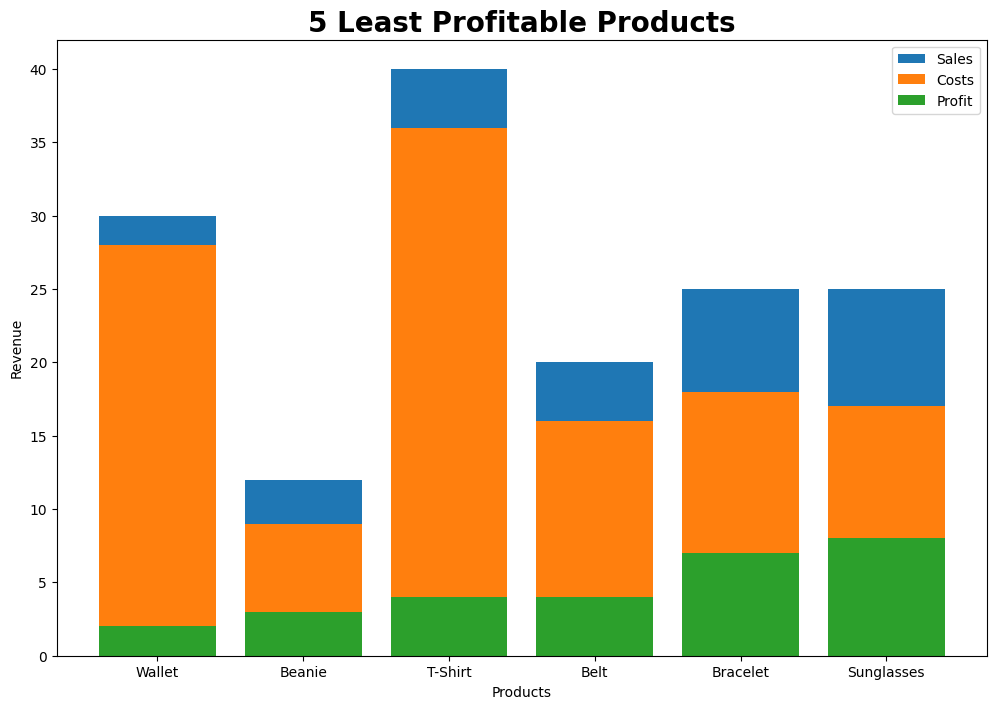

In [8]:
# Stacked bar plot

fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=products,height=sales,label='Sales')
ax.bar(x=products,height=costs,label='Costs')
ax.bar(x=products,height=profit,label='Profit')
plt.legend()
ax.set(xlabel='Products',ylabel='Revenue')
plt.title(label="5 Least Profitable Products",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()